<img src="https://raw.githubusercontent.com/GeorgeTelles/georgetelles/f69531ec6b293b5148563588a764c010015d315e/logo_clara.png" width="300">
<img src="https://raw.githubusercontent.com/GeorgeTelles/georgetelles/f69531ec6b293b5148563588a764c010015d315e/logo_dark.png" width="300">

---

# Extração Taxas DI com Grafico de curva de Juros

# 0. Noções conceituais

**O que são os contratos futuros de DI?**

*Futuro de Taxa Média de Depósitos Interfinanceiros de Um Dia*

O produto

O Contrato Futuro de DI1 tem como ativo subjacente a taxa média diária dos Depósitos Interfinanceiros (DI), calculada e divulgada pela B3, compreendida entre a data de negociação, inclusive, e a data de vencimento, exclusive, e é utilizado para proteção e gerenciamento de risco de taxa de juro de ativos/passivos referenciados em DI.

(B3)

Contratos futuros de DI são a principal referência para mostrar a expectativa do mercado em relação aos próximos movimentos do Copom e ao futuro das taxas Selic e CDI.

(Infomoney)


Referências:

https://www.b3.com.br/pt_br/produtos-e-servicos/negociacao/juros/futuro-de-taxa-media-de-depositos-interfinanceiros-de-um-dia.htm
    
https://www.infomoney.com.br/ferramentas/juros-futuros-di/

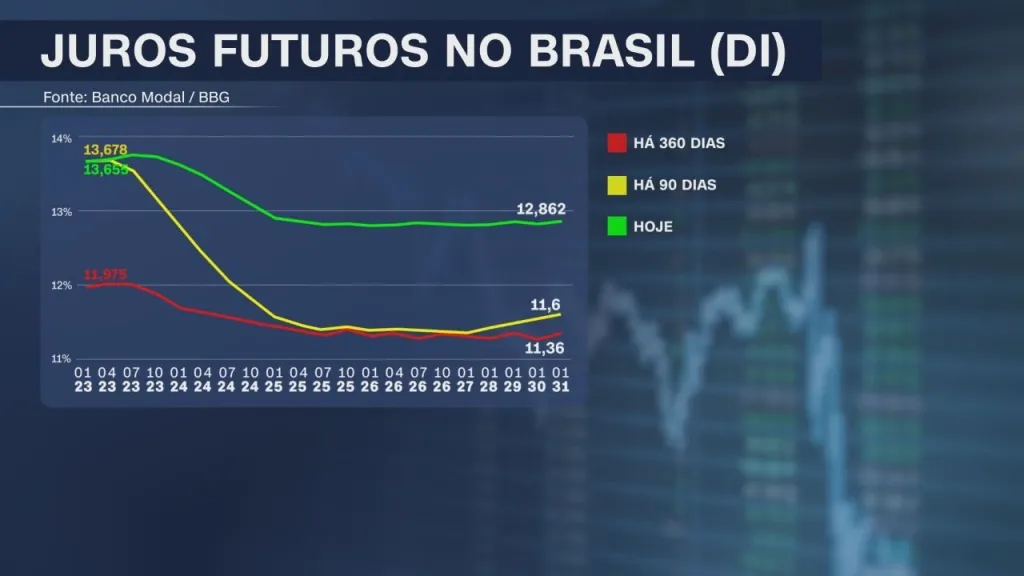

Fonte: https://www.cnnbrasil.com.br/economia/mercado-projeta-juros-de-dois-digitos-no-brasil-por-8-anos/

---

A B3 divulga a cotação atualizada dos diversos contratos futuros de DI:
    
https://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/cotacoes/mercado-de-derivativos/?symbol=DI1

# 1. Importar bibliotecas

In [ ]:
import pandas as pd
from io import StringIO

import requests

from selenium import webdriver

from selenium.webdriver.common.by import By

from selenium.webdriver.support.ui import Select

# 2. Obtendo dados

In [ ]:
# Inicializa o driver do navegador (sem especificar o caminho do executável)
driver = webdriver.Chrome()

# Abre o site
driver.get('https://www2.bmf.com.br/pages/portal/bmfbovespa/lumis/lum-boletim-online-ptBR.asp?Acao=BUSCA&cboMercadoria=DI1')

# Procurando Tabela
driver.find_element(By.XPATH, '//*[@id="principal"]')

tabel = driver.find_element(By.XPATH, '//*[@id="principal"]/tbody').get_attribute('outerHTML')

tabela = StringIO(tabel)

driver.quit()


# 3. Obtenção e manipulação dos dados

In [ ]:
for i in range(1,4):
    tabela_full = pd.concat([tabela_full, pd.read_html(tabela, decimal = ',', thousands = '.')[i]], axis=1)

In [ ]:
tabela_full

**Tirando colunas que todos os dados são Nulos**

In [ ]:
percent_missing = tabela_full.isnull().sum() * 100 / len(tabela_full)
list(percent_missing[percent_missing==100].index)
[percent_missing[percent_missing==100].index]
tabela_full.drop(list(percent_missing[percent_missing==100].index), axis = 1, inplace = True)

In [ ]:
tabela_full

# 4. Plotando a curva de juros

In [ ]:
tabela_full.index = tabela_full['Vecto.']
tabela_full.iloc[:-1]['Último Preço'].plot(figsize = (12,6));